In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from sklearn.ensemble import RandomForestClassifier
import datetime

In [2]:
columns_for_normalization = ['Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']

columns_for_bins = ['Elevation', 'Horizontal_Distance_To_Roadways']

**_Get data_**

In [3]:
dataset = pd.read_csv('train.csv')
dataset.drop("Id", axis=1, inplace=True)

**_Get test data_**

In [4]:
test_data = pd.read_csv('test.csv')
id_column = test_data["Id"].copy(deep=True)
test_data.drop("Id", axis=1, inplace=True)

**_Work with SoilType_**

In [5]:
import itertools
all_soil_types_to_delete = [8, 9, 36,35, 34, 28, 27, 26, 21, 19, 18, 14, 11]
all_combinations = []
for r in range(len(all_soil_types_to_delete) + 1):
    combinations_object = itertools.combinations(all_soil_types_to_delete, r)
    combinations_list = list(combinations_object)
    all_combinations += combinations_list

print(len(all_combinations))
all_combinations[0]

8192


()

**_Delete columns_**

In [6]:
# dataset.drop('Soil_Type9', axis=1, inplace=True)
# test_data.drop('Soil_Type9', axis=1, inplace=True)

**_Get training data_**

In [7]:
X = dataset.drop("Cover_Type", axis=1)
y = dataset["Cover_Type"]

In [8]:
X.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40

**_Featire engineering average distances_**

In [9]:
X["Average_Elev_Vert_Hydr"] = X[['Elevation', 'Vertical_Distance_To_Hydrology']].mean(axis=1)
test_data["Average_Elev_Vert_Hydr"] = test_data[['Elevation', 'Vertical_Distance_To_Hydrology']].mean(axis=1)

X["Average_Hydro_Road"] = X[['Horizontal_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways']].mean(axis=1)
test_data["Average_Hydro_Road"] = test_data[['Horizontal_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways']].mean(axis=1)

X["Average_Hydro_Fire"] = X[['Horizontal_Distance_To_Hydrology', 'Horizontal_Distance_To_Fire_Points']].mean(axis=1)
test_data["Average_Hydro_Fire"] = test_data[['Horizontal_Distance_To_Hydrology', 'Horizontal_Distance_To_Fire_Points']].mean(axis=1)

X["Average_Road_Fire"] = X[['Horizontal_Distance_To_Roadways', 'Horizontal_Distance_To_Fire_Points']].mean(axis=1)
test_data["Average_Road_Fire"] = test_data[['Horizontal_Distance_To_Roadways', 'Horizontal_Distance_To_Fire_Points']].mean(axis=1)

X["Average_Road_Fire_Hydro"] = X[['Horizontal_Distance_To_Roadways', 'Horizontal_Distance_To_Fire_Points', 'Horizontal_Distance_To_Hydrology']].mean(axis=1)
test_data["Average_Road_Fire_Hydro"] = test_data[['Horizontal_Distance_To_Roadways', 'Horizontal_Distance_To_Fire_Points', 'Horizontal_Distance_To_Hydrology']].mean(axis=1)

**_Feature engineering average degrees_**

In [10]:
X["Average_Hillshade"] = X[['Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm']].mean(axis=1)
test_data["Average_Hillshade"] = test_data[['Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm']].mean(axis=1)

**_Normalize data_**

In [11]:
columns_for_normalization = ['Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Average_Elev_Vert_Hydr', 'Average_Hydro_Road', 'Average_Hydro_Fire', 'Average_Road_Fire', 'Average_Hillshade', 'Average_Road_Fire_Hydro']
X[columns_for_normalization] = normalize(X[columns_for_normalization])
test_data[columns_for_normalization] = normalize(test_data[columns_for_normalization])

In [12]:
X

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Average_Elev_Vert_Hydr,Average_Hydro_Road,Average_Hydro_Fire,Average_Road_Fire,Average_Road_Fire_Hydro,Average_Hillshade
0,2596,0.006130,0.000361,0.031011,0.000000,510,0.026564,0.027886,0.017789,0.754725,...,0,0,0,0,0.156017,0.046156,0.392868,0.408013,0.282346,0.024080
1,2590,0.006831,0.000244,0.025861,-0.000732,390,0.026837,0.028666,0.018420,0.759356,...,0,0,0,0,0.157605,0.036717,0.392609,0.403465,0.277597,0.024641
2,2804,0.015097,0.000978,0.029108,0.007060,3180,0.025415,0.025850,0.014663,0.664821,...,0,0,0,0,0.155806,0.187249,0.346965,0.505106,0.346440,0.021976
3,2785,0.016726,0.001942,0.026114,0.012733,3090,0.025682,0.025682,0.013165,0.670218,...,0,0,0,0,0.156629,0.179775,0.348166,0.501827,0.343256,0.021510
4,2595,0.005547,0.000247,0.018858,-0.000123,391,0.027117,0.028842,0.018489,0.760743,...,0,0,0,0,0.159865,0.033526,0.389801,0.404468,0.275932,0.024816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15115,2607,0.099665,0.009433,0.105817,0.002871,660,0.069724,0.102946,0.087771,0.525805,...,0,0,0,0,0.536058,0.188256,0.315811,0.398250,0.300772,0.086814
15116,2603,0.044627,0.007008,0.233463,0.071920,618,0.091836,0.081509,0.033563,0.488686,...,0,0,0,0,0.515978,0.230696,0.361074,0.358308,0.316693,0.068969
15117,2492,0.059178,0.011041,0.161192,0.051670,335,0.110406,0.097157,0.036655,0.524207,...,0,0,0,0,0.576097,0.154568,0.342700,0.336075,0.277781,0.081406
15118,2487,0.086427,0.014491,0.112821,0.052270,242,0.118514,0.122654,0.061586,0.482336,...,0,0,0,0,0.669681,0.119031,0.297578,0.303789,0.240133,0.100918


**_Create bins_**

d:\miniconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Elevation'>

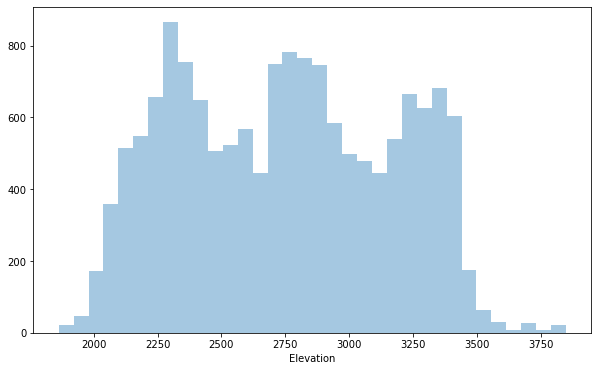

In [13]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.distplot(a=X['Elevation'], kde=False)

<AxesSubplot:xlabel='Elevation'>

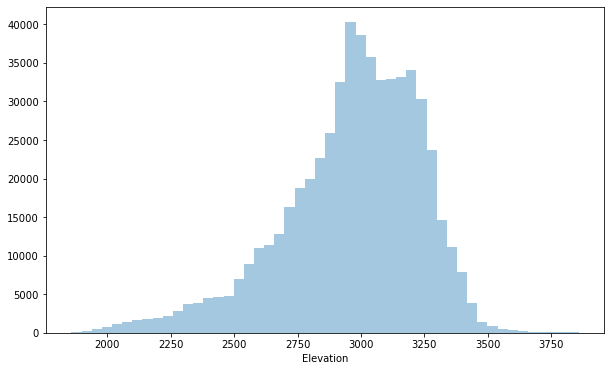

In [14]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.distplot(a=test_data['Elevation'], kde=False)

**_Train model_**

In [15]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier(n_jobs=-1, random_state=42).fit(X, y)
model.fit(X, y)

ExtraTreesClassifier(n_jobs=-1, random_state=42)

**_Predict probability_**

In [16]:
predicted_probability = model.predict_proba(test_data)
df_probabilities = pd.DataFrame(predicted_probability, index=id_column)

**_Predict model_**

In [17]:
y_predicted = model.predict(test_data)
df_for_saving = pd.DataFrame(y_predicted, index=id_column, columns=["Cover_Type"])

In [18]:
df_for_saving[df_probabilities.max(axis=1) < 0.5] = 2

**_Save dataset_**

In [19]:
df_for_saving.to_csv('cover_type.csv', index_label="Id")

Combinations tried:
    - standard scaler

1 - Spruce/Fir

2 - Lodgepole Pine

3 - Ponderosa Pine

4 - Cottonwood/Willow

5 - Aspen

6 - Douglas-fir

7 - Krummholz

<AxesSubplot:xlabel='Wilderness_Area1'>

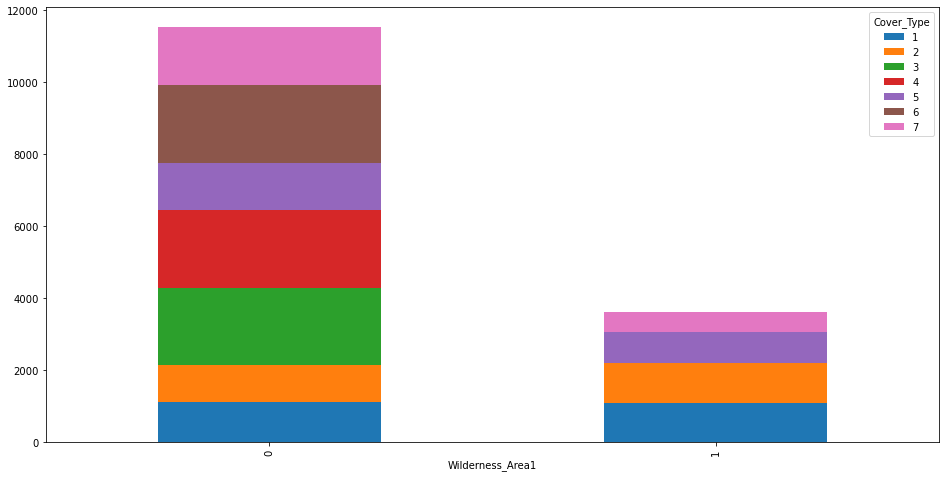

In [20]:
plt.rcParams["figure.figsize"] = (16,8)
df2 = dataset.groupby(['Wilderness_Area1', 'Cover_Type'])['Wilderness_Area1'].count().unstack('Cover_Type')
df2[[1, 2, 3, 4, 5, 6, 7]].plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='Wilderness_Area2'>

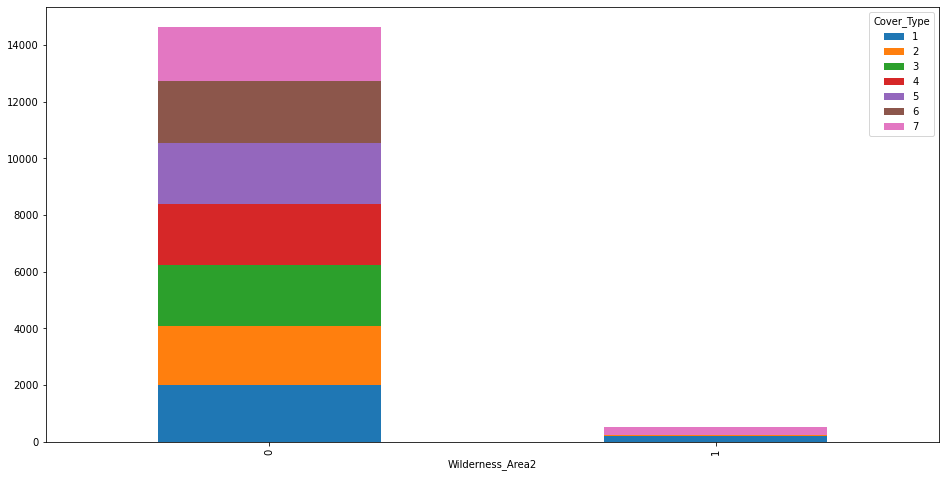

In [21]:
df2 = dataset.groupby(['Wilderness_Area2', 'Cover_Type'])['Wilderness_Area2'].count().unstack('Cover_Type')
df2[[1, 2, 3, 4, 5, 6, 7]].plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='Wilderness_Area3'>

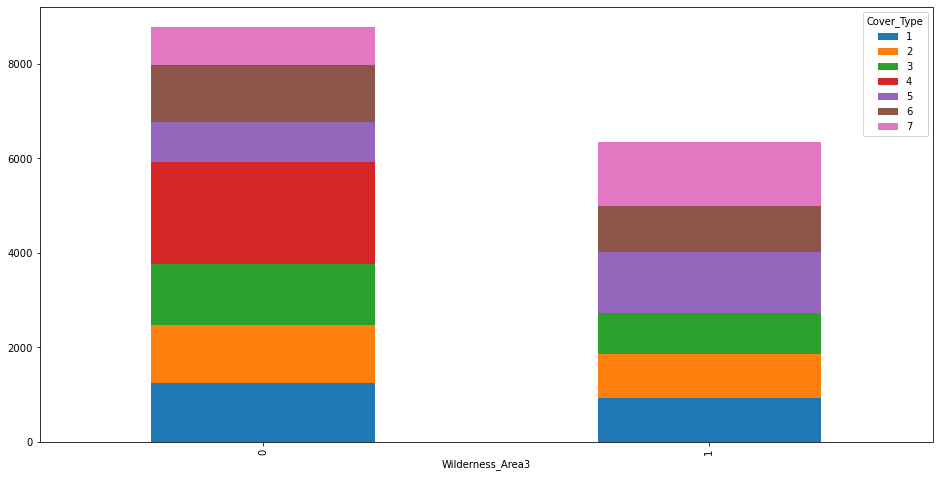

In [22]:
df2 = dataset.groupby(['Wilderness_Area3', 'Cover_Type'])['Wilderness_Area3'].count().unstack('Cover_Type')
df2[[1, 2, 3, 4, 5, 6, 7]].plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='Wilderness_Area4'>

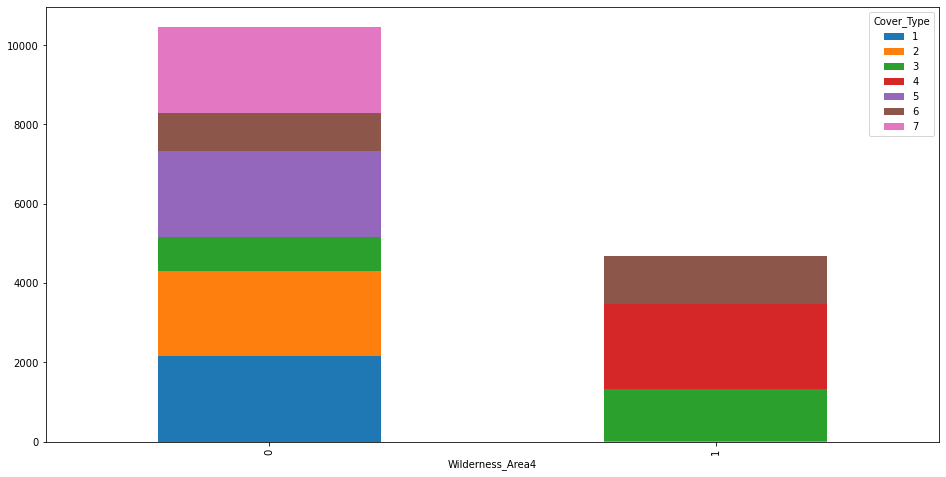

In [23]:
df2 = dataset.groupby(['Wilderness_Area4', 'Cover_Type'])['Wilderness_Area4'].count().unstack('Cover_Type')
df2[[1, 2, 3, 4, 5, 6, 7]].plot(kind='bar', stacked=True)

**_Examining soil_**

d:\miniconda\lib\site-packages\pandas\plotting\_matplotlib\core.py:386: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


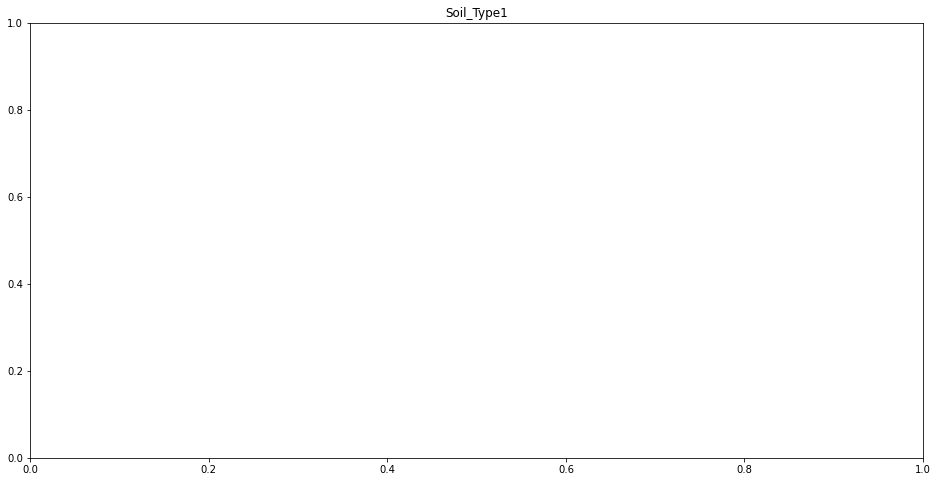

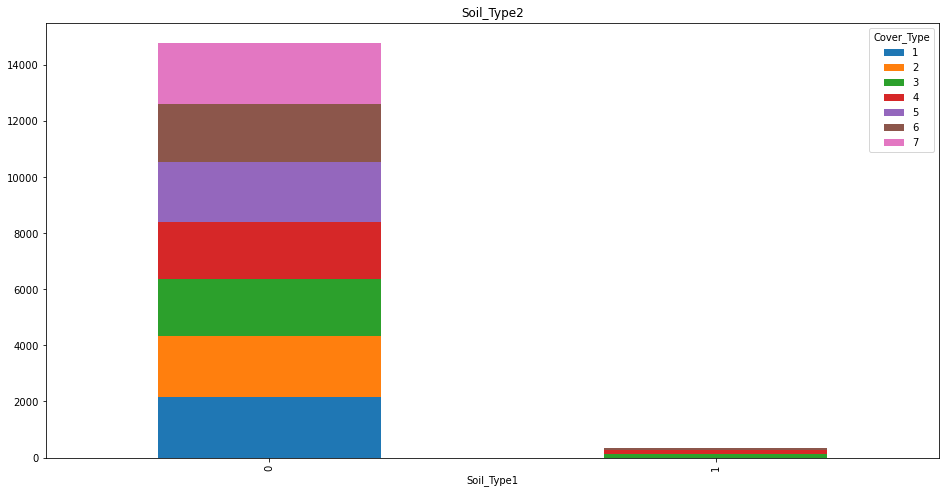

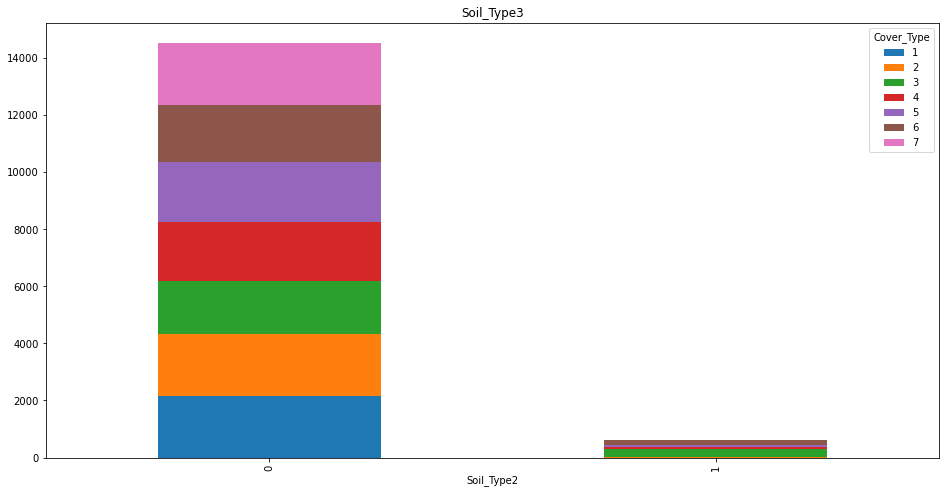

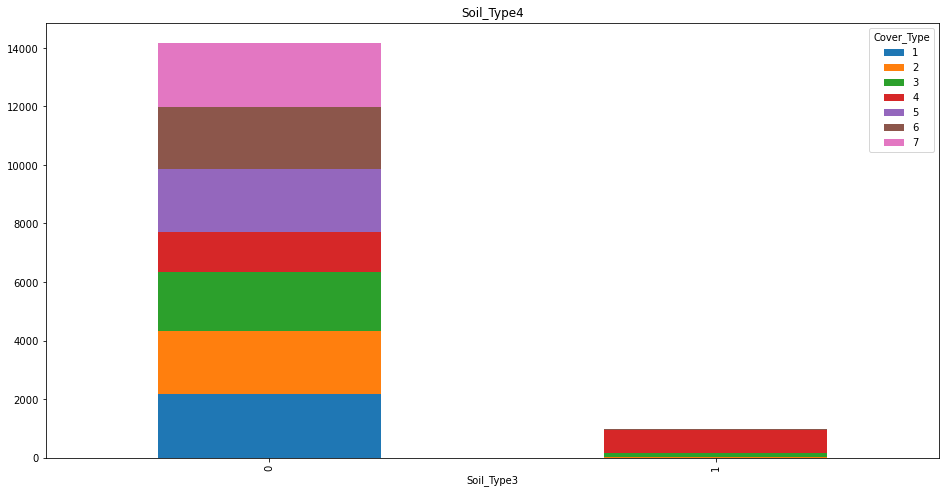

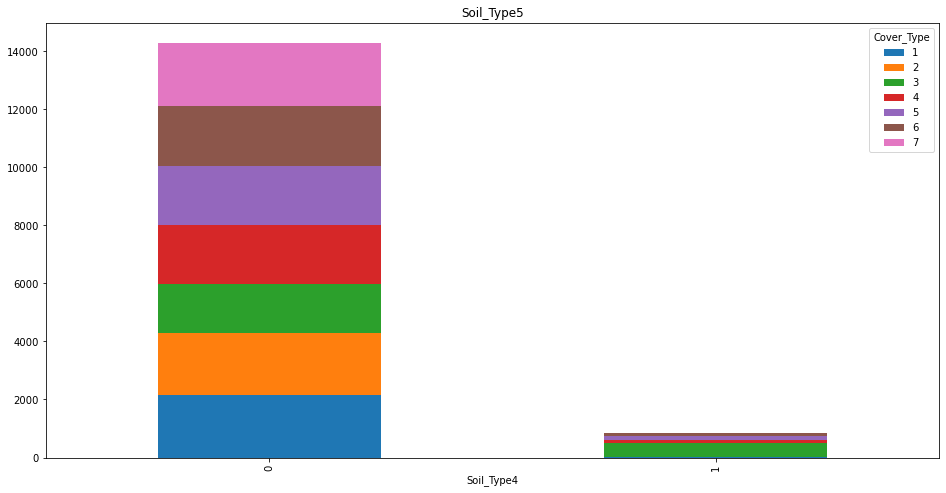

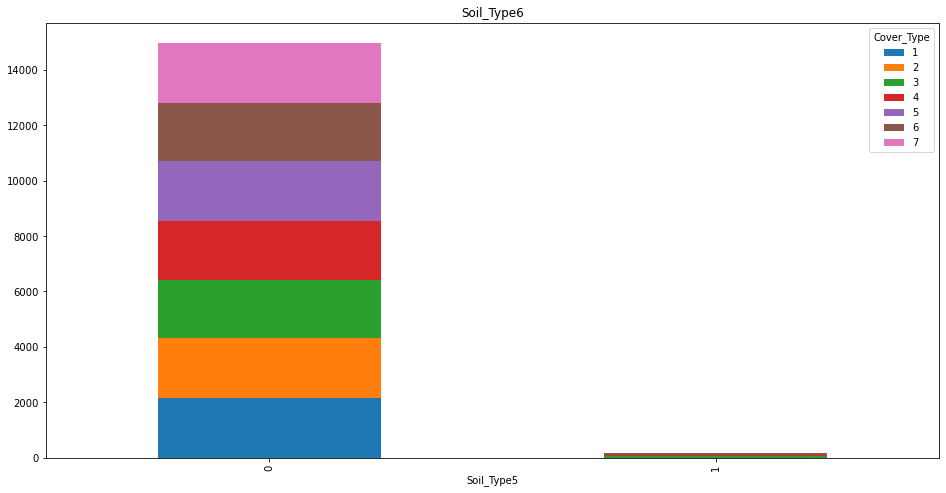

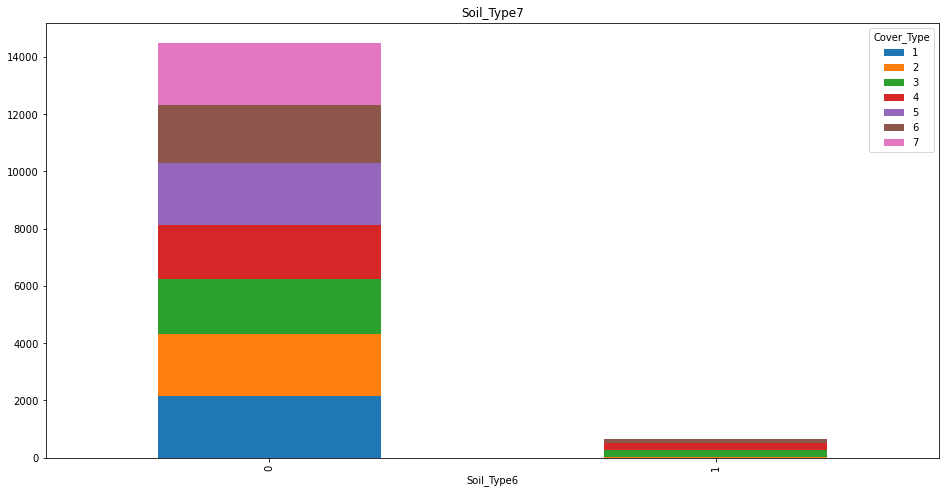

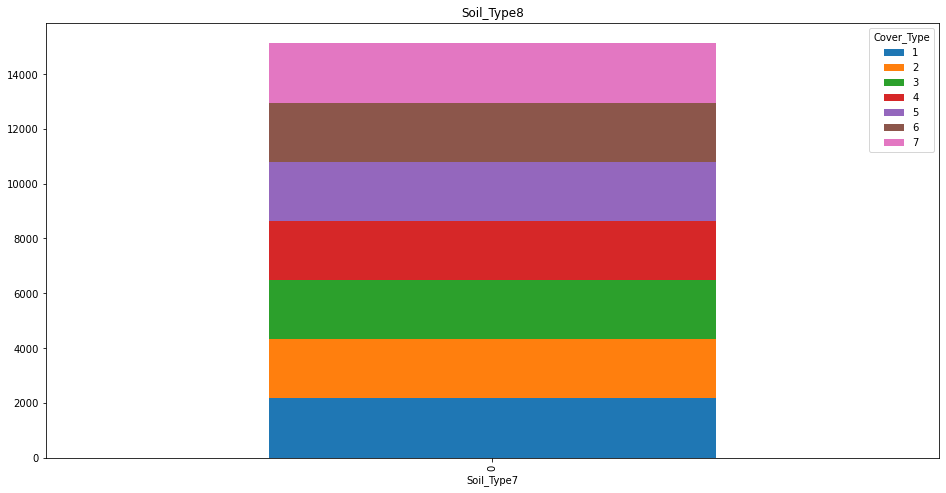

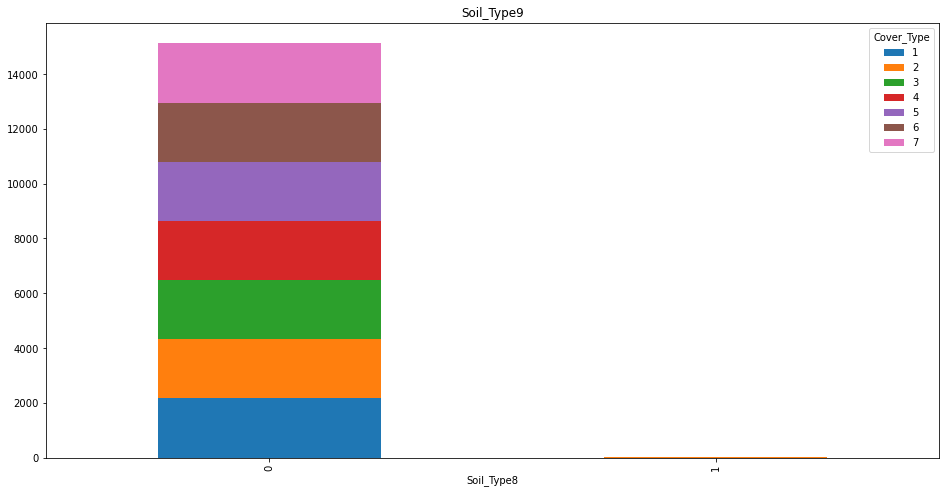

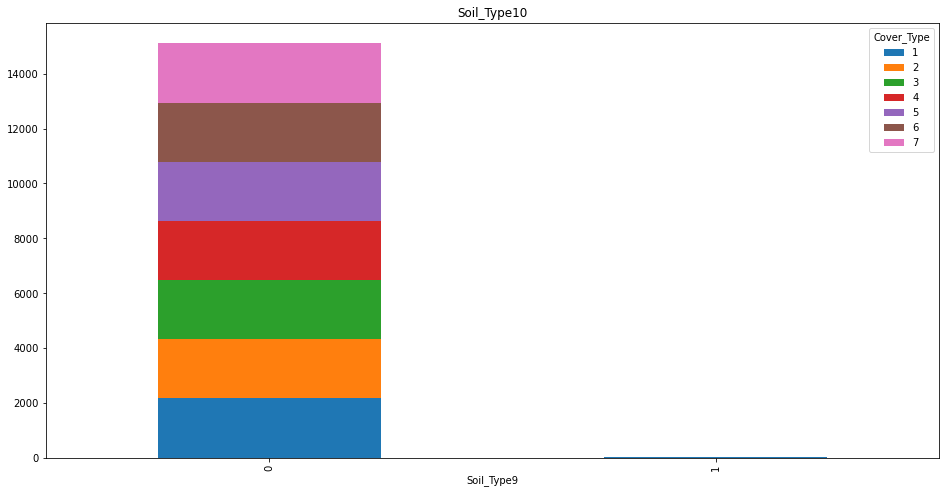

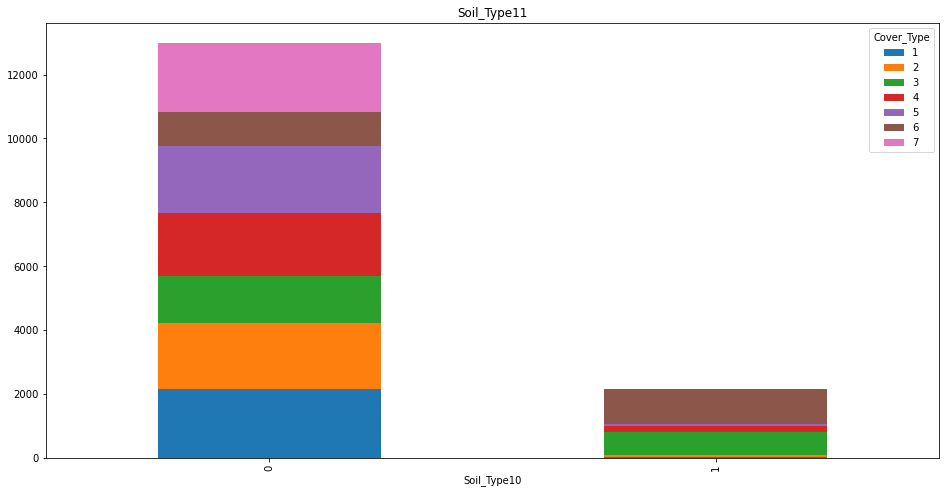

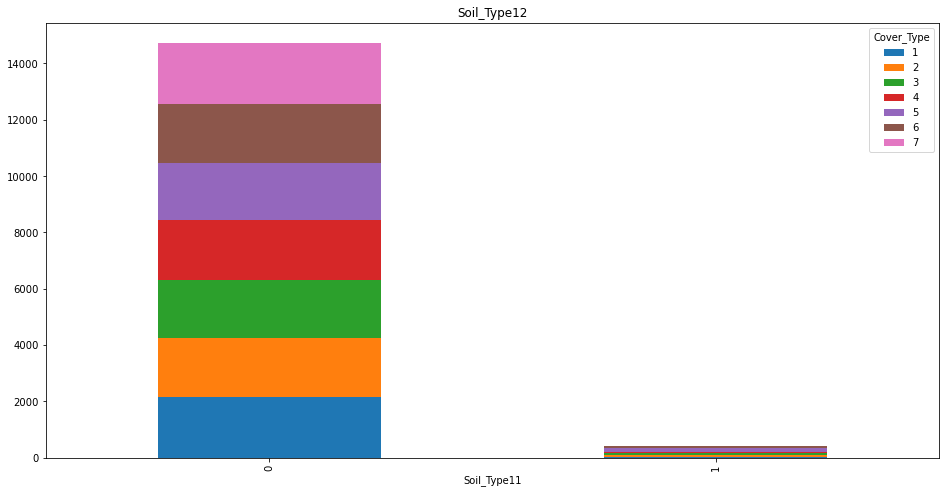

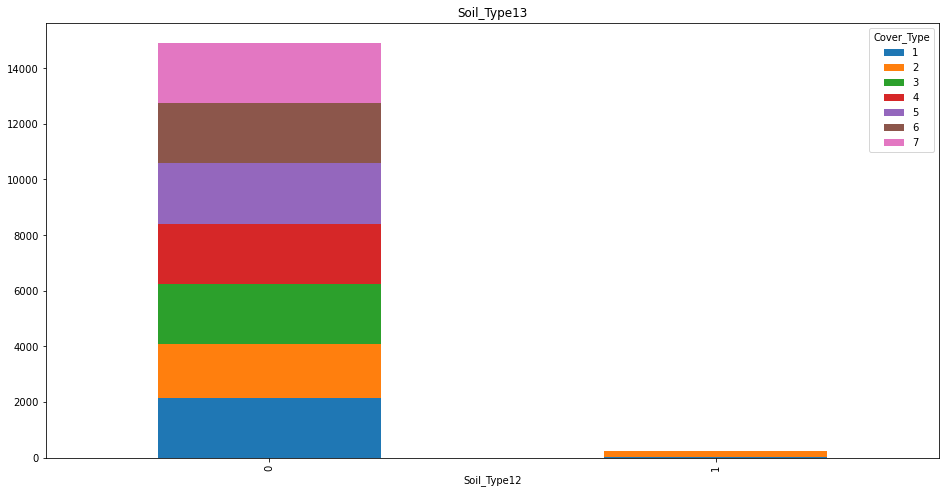

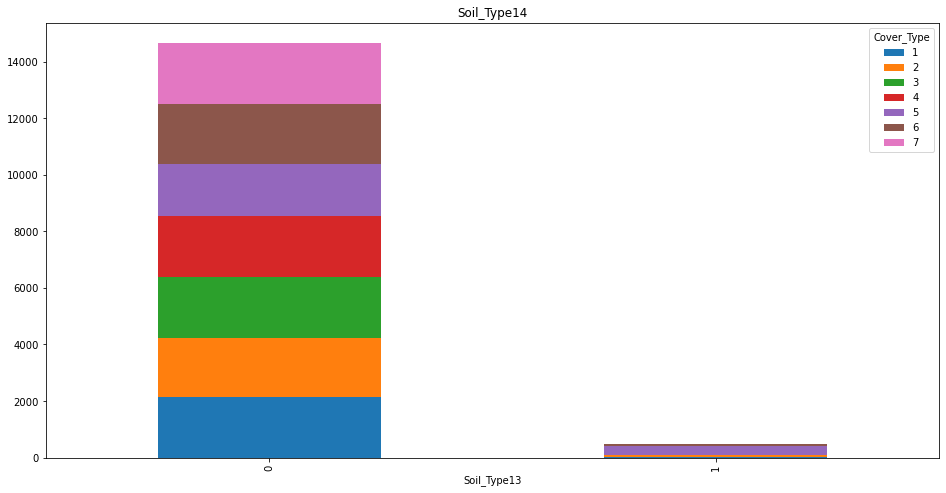

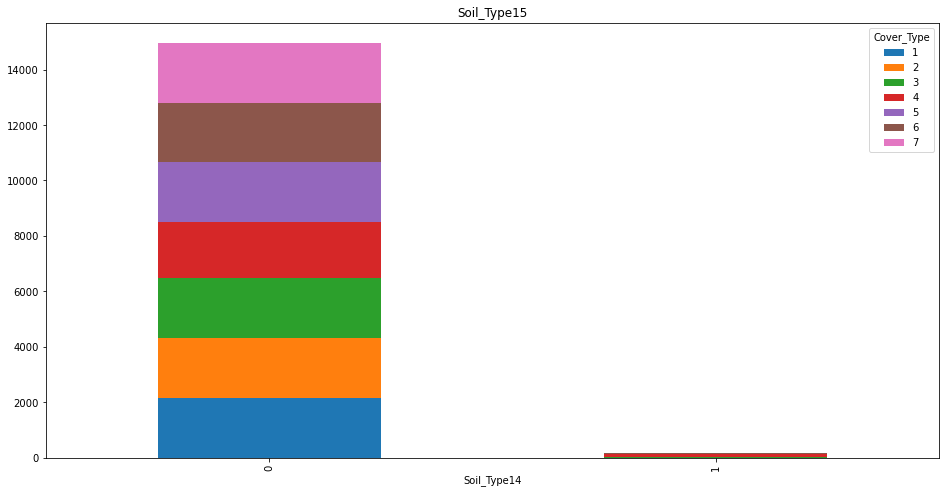

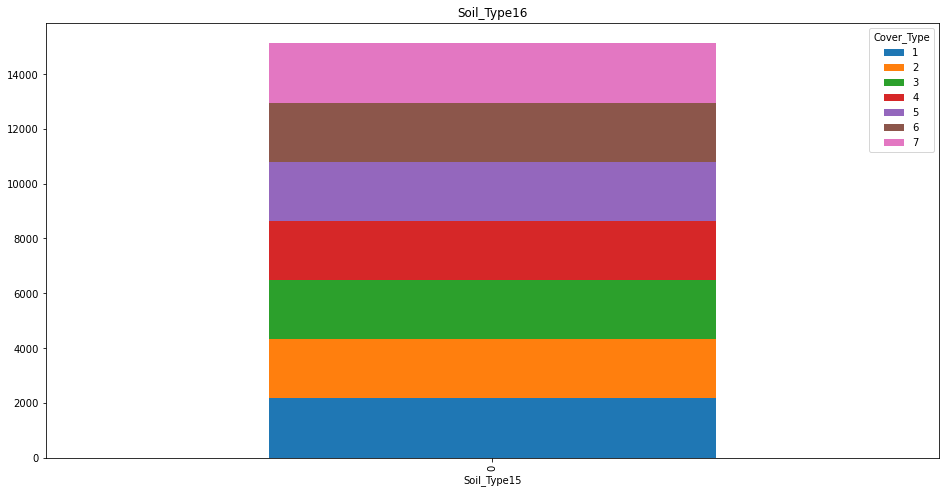

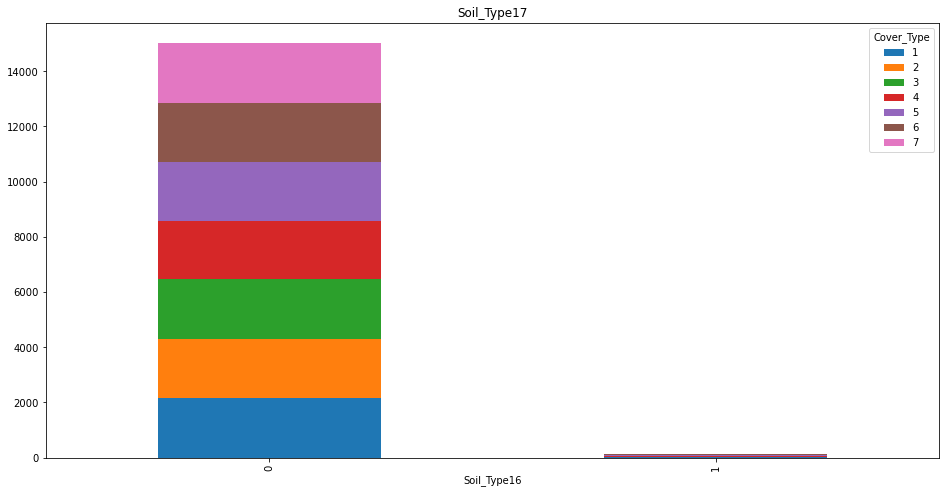

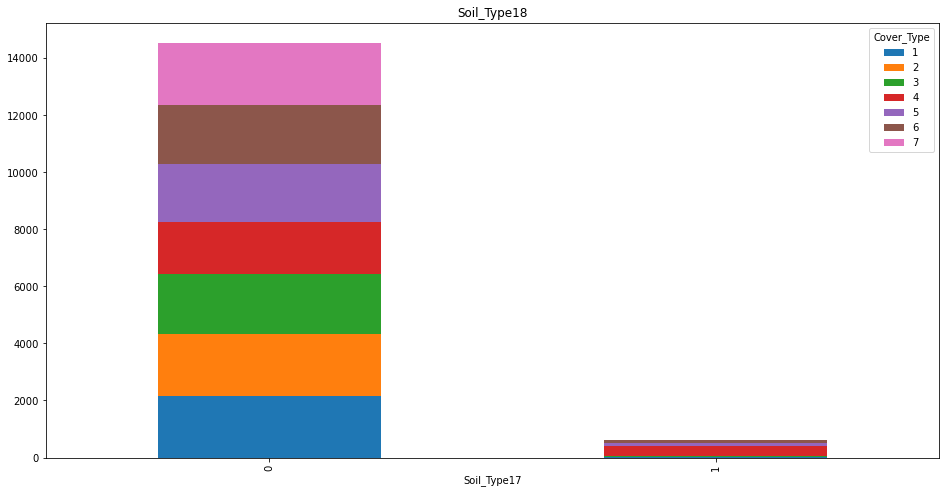

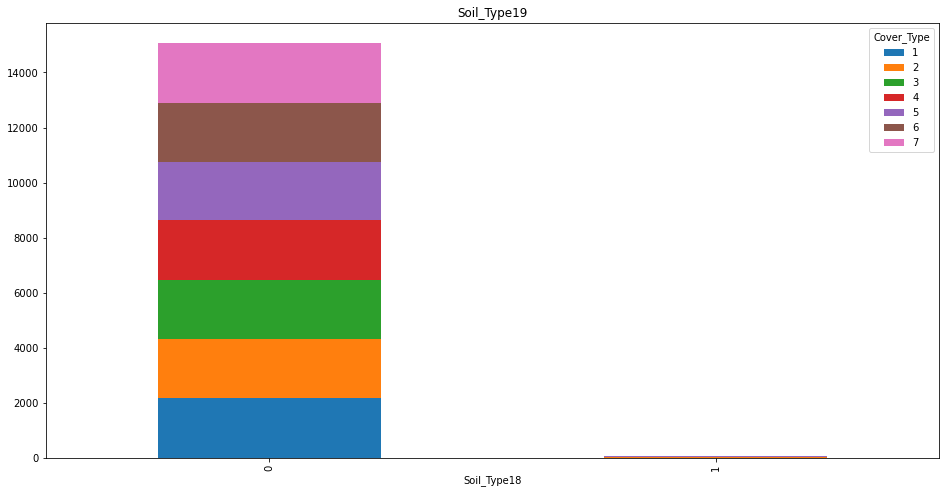

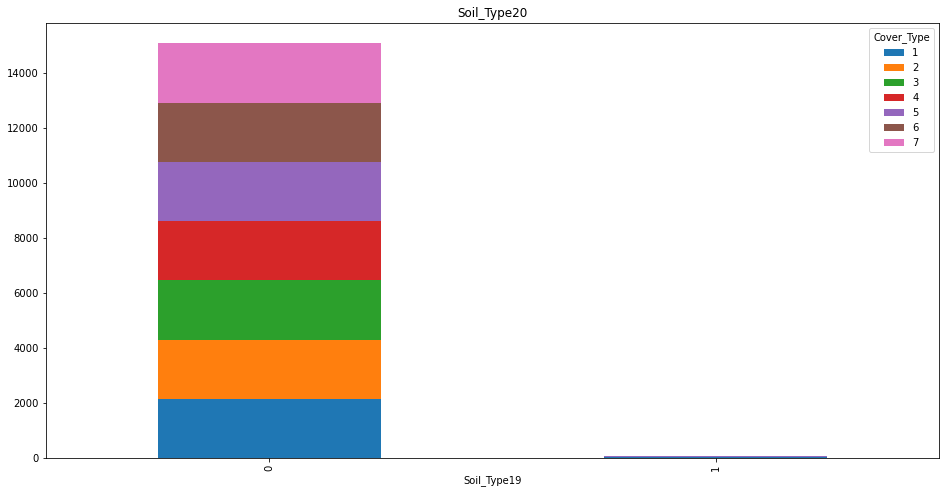

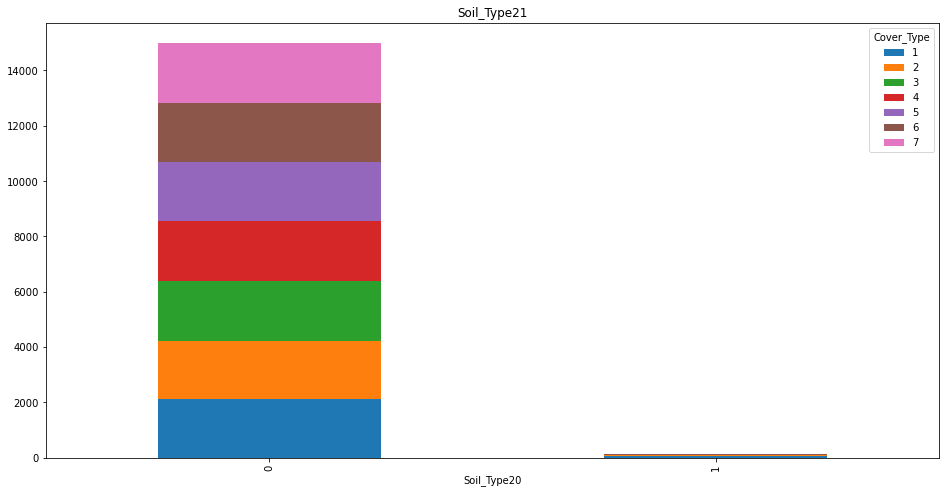

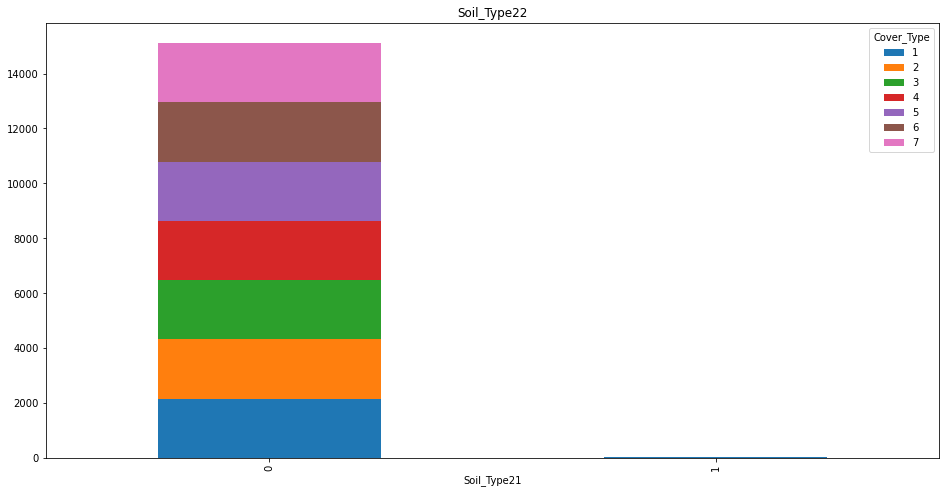

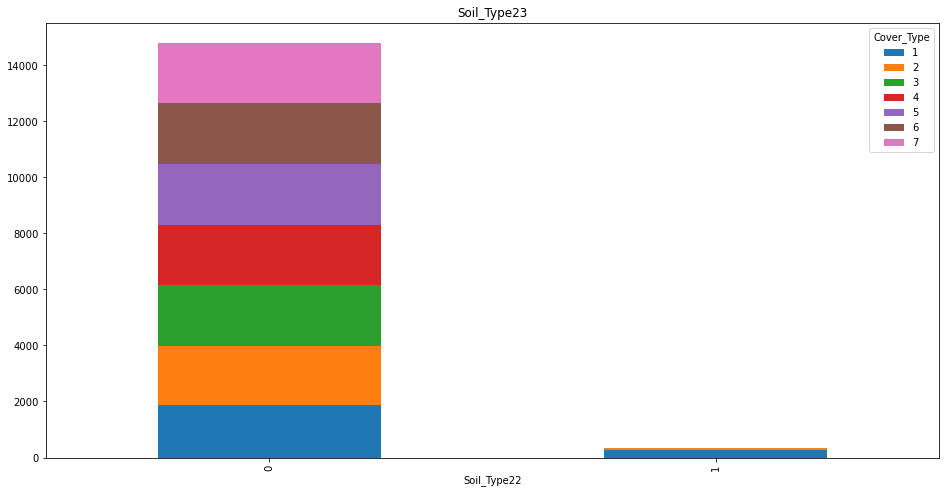

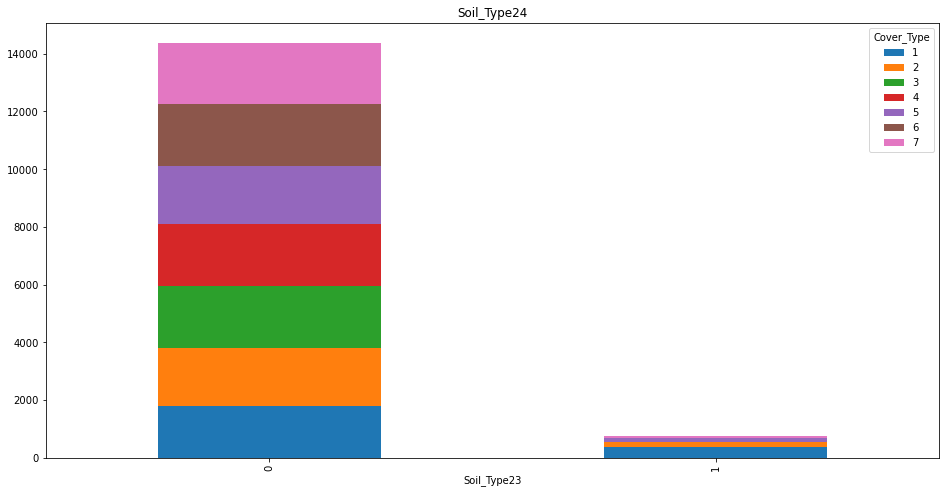

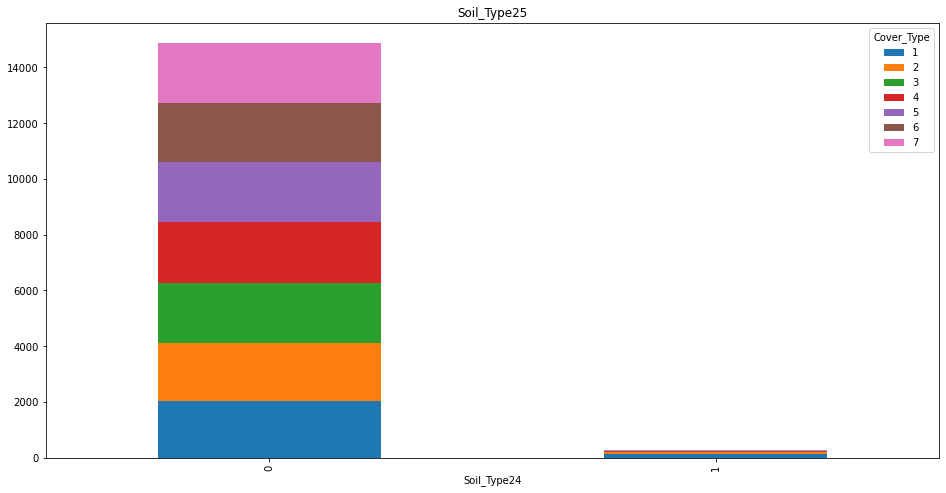

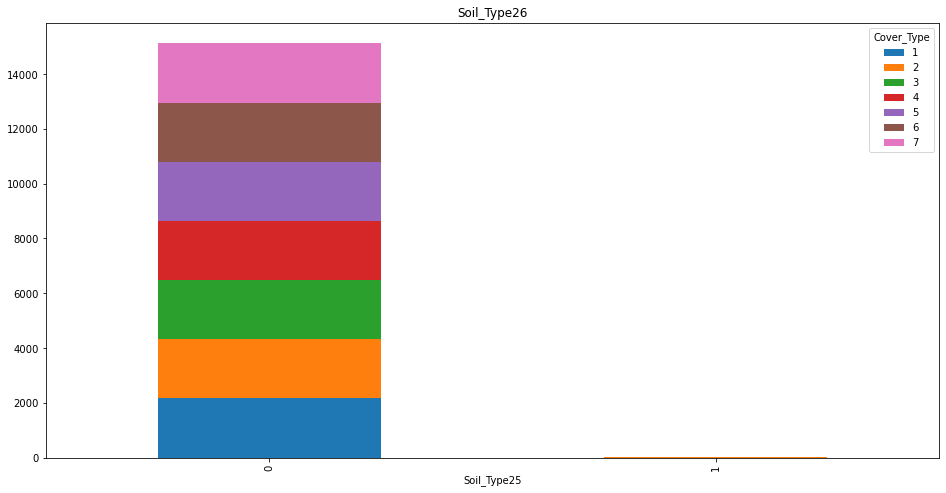

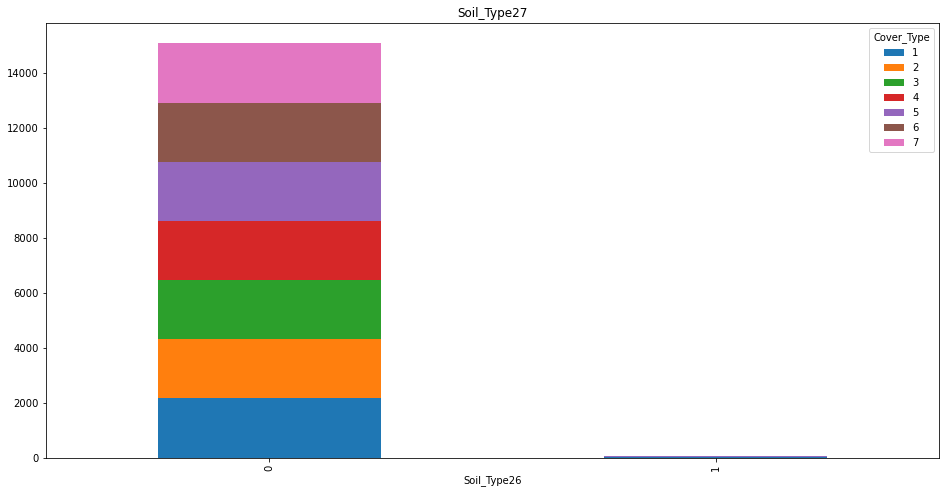

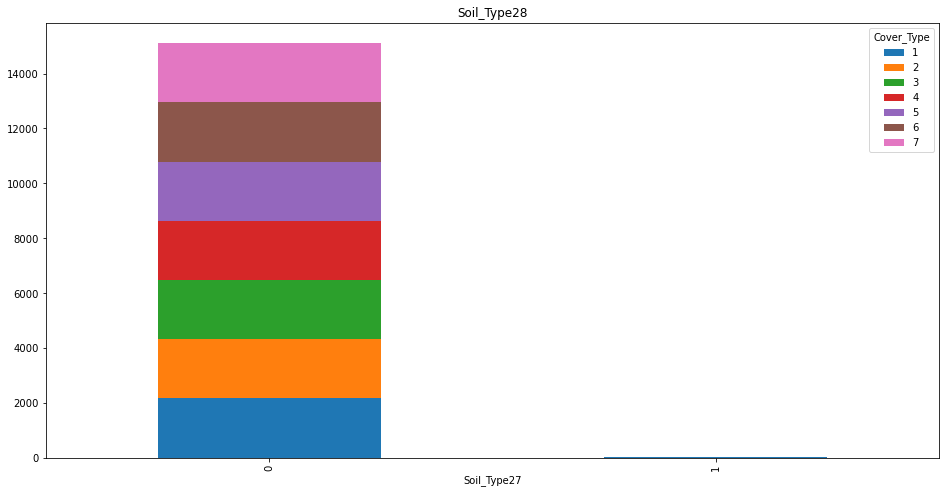

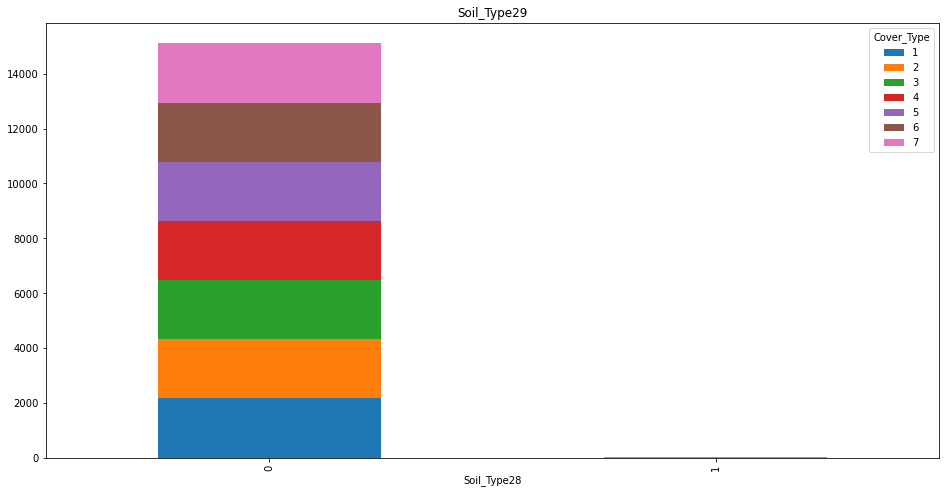

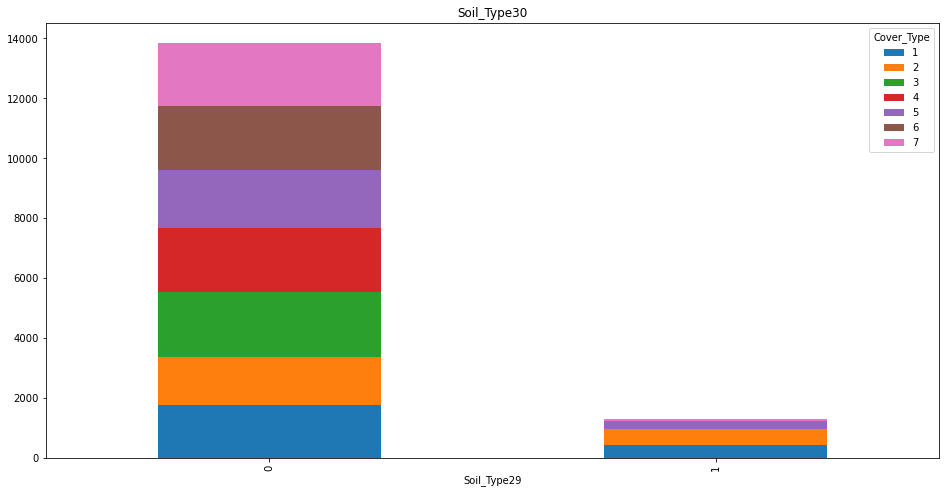

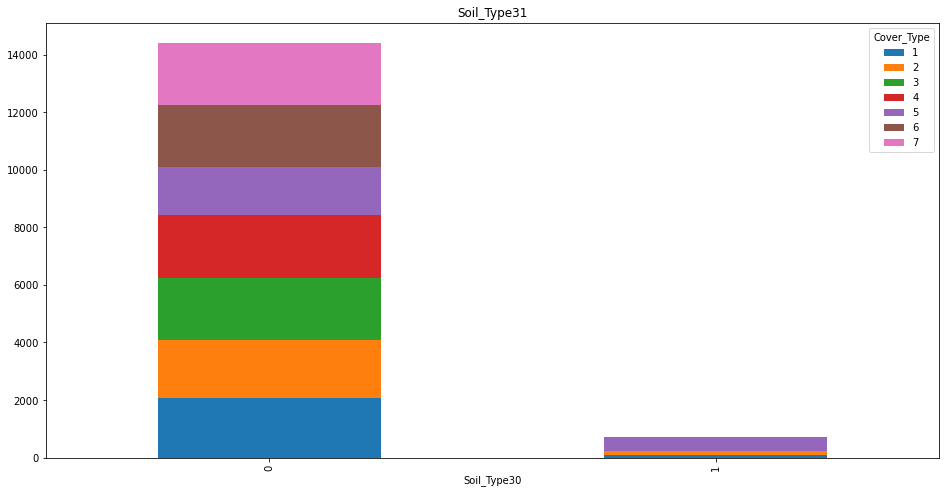

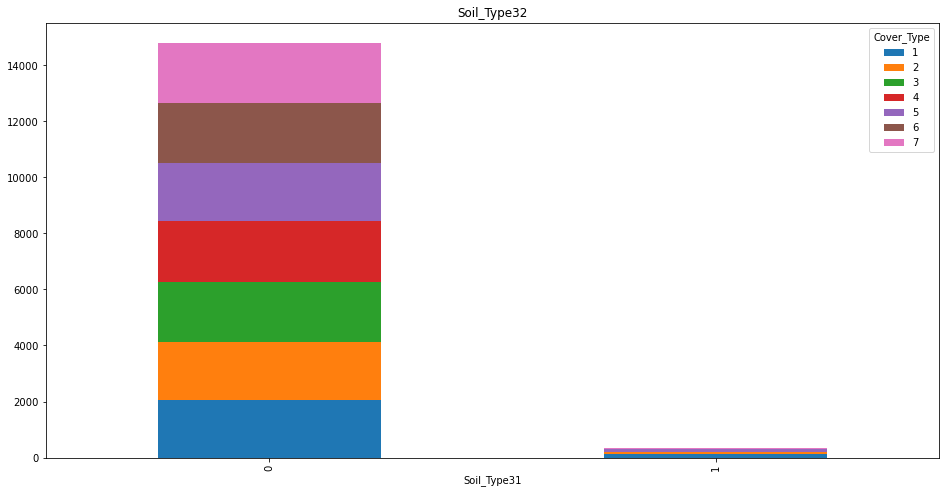

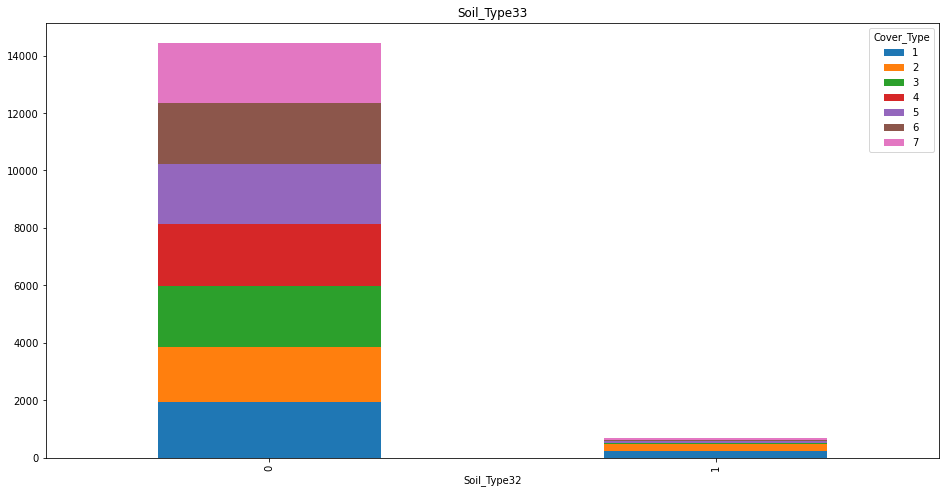

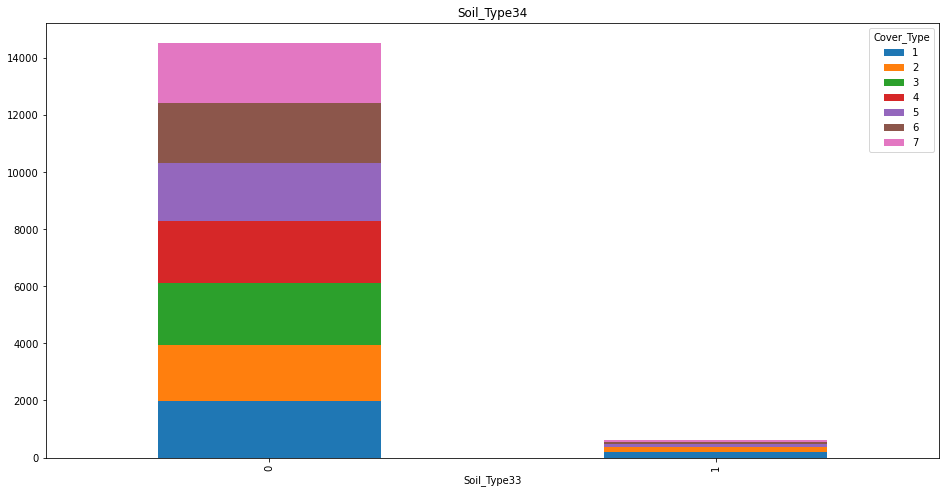

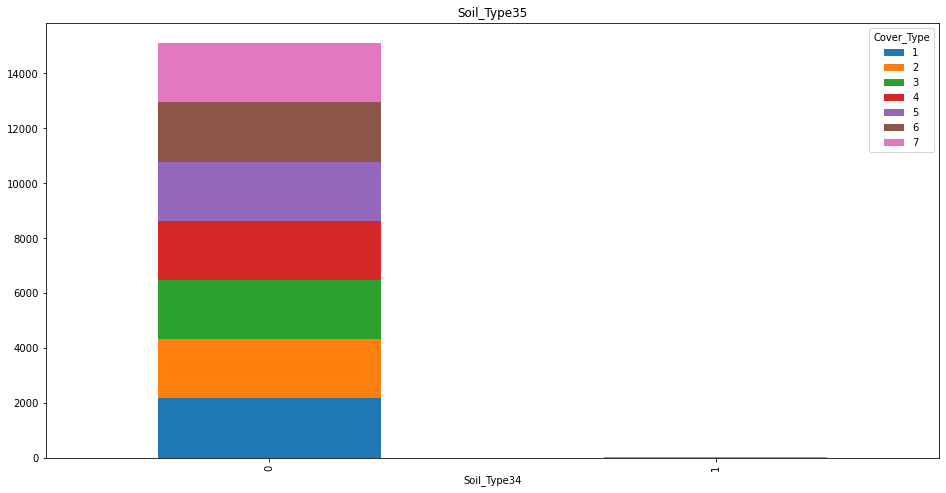

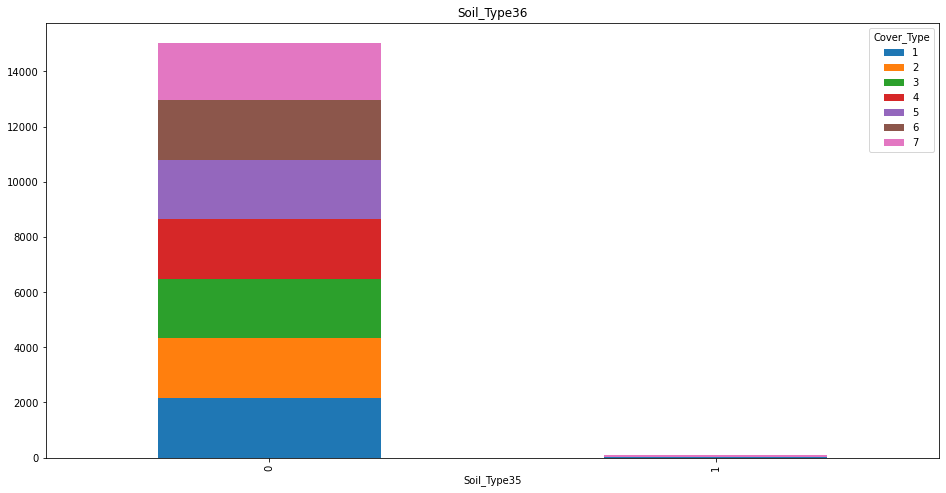

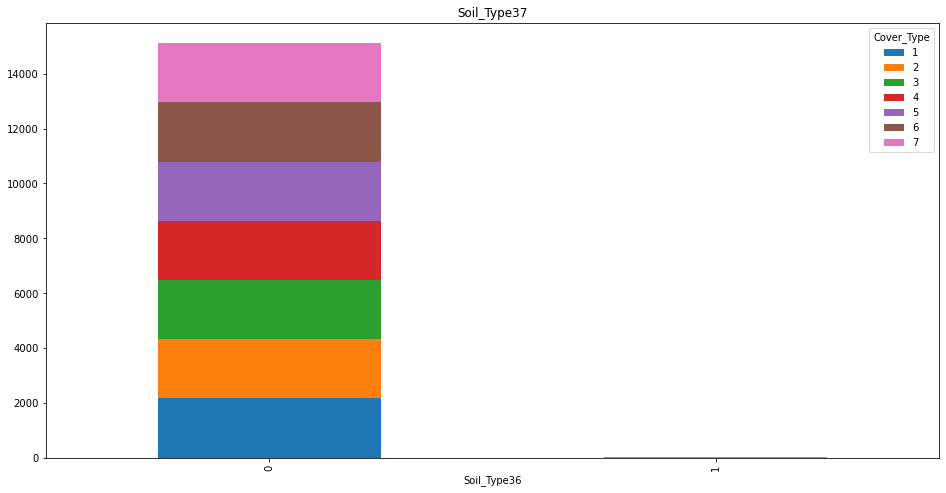

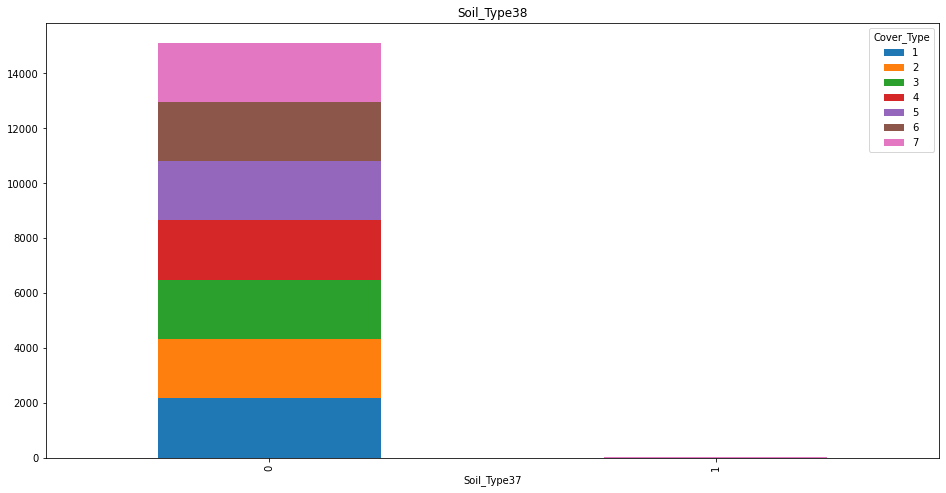

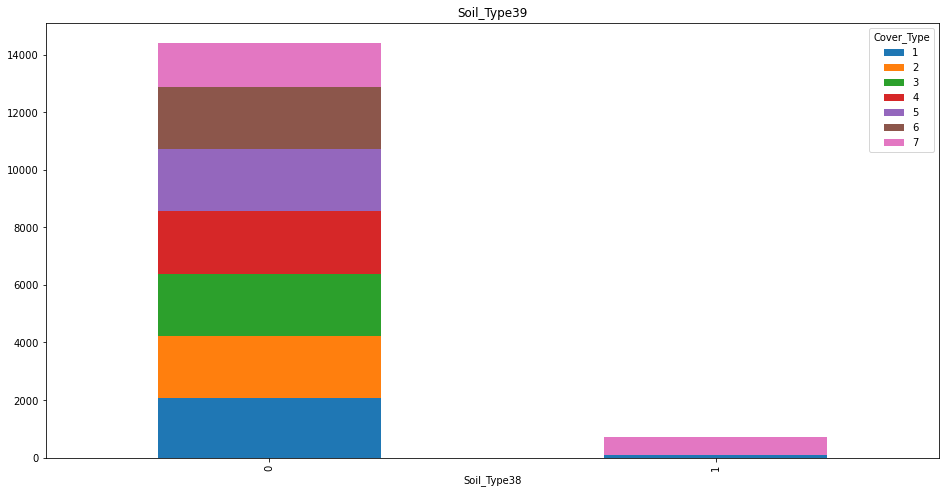

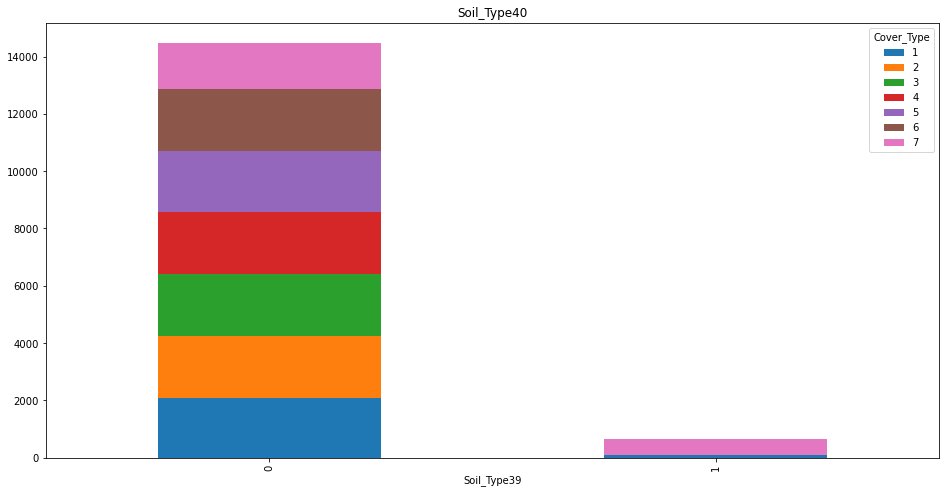

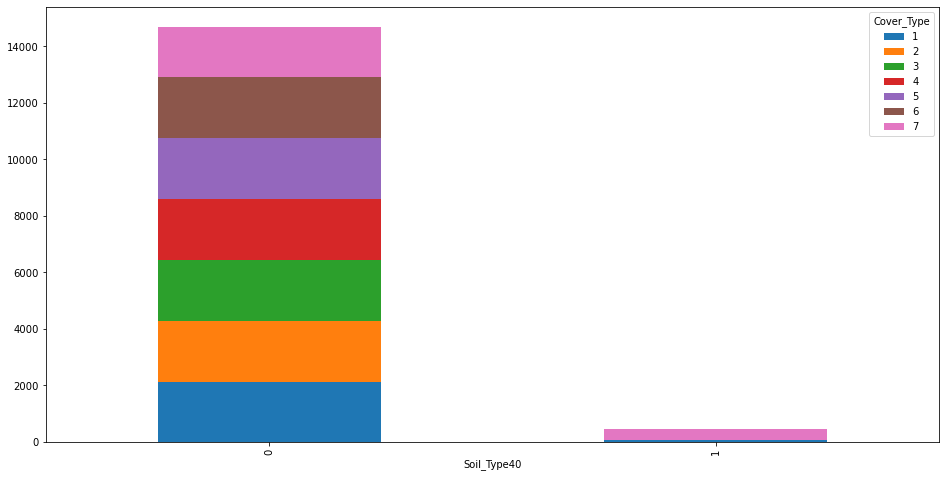

In [24]:
for i in range(1, 41):
    plt.rcParams["figure.figsize"] = (16,8)
    df2 = dataset.groupby([f'Soil_Type{i}', 'Cover_Type'])[f'Soil_Type{i}'].count().unstack('Cover_Type')
    plt.title(f'Soil_Type{i}')
    df2[[1, 2, 3, 4, 5, 6, 7]].plot(kind='bar', stacked=True)

In [25]:
for i in range(1, 41):
    print(test_data[f'Soil_Type{i}'].value_counts())

0    563216
1      2676
Name: Soil_Type1, dtype: int64
0    558990
1      6902
Name: Soil_Type2, dtype: int64
0    562031
1      3861
Name: Soil_Type3, dtype: int64
0    554339
1     11553
Name: Soil_Type4, dtype: int64
0    564460
1      1432
Name: Soil_Type5, dtype: int64
0    559967
1      5925
Name: Soil_Type6, dtype: int64
0    565787
1       105
Name: Soil_Type7, dtype: int64
0    565714
1       178
Name: Soil_Type8, dtype: int64
0    564755
1      1137
Name: Soil_Type9, dtype: int64
0    535400
1     30492
Name: Soil_Type10, dtype: int64
0    553888
1     12004
Name: Soil_Type11, dtype: int64
0    536148
1     29744
Name: Soil_Type12, dtype: int64
0    548937
1     16955
Name: Soil_Type13, dtype: int64
0    565462
1       430
Name: Soil_Type14, dtype: int64
0    565889
1         3
Name: Soil_Type15, dtype: int64
0    563161
1      2731
Name: Soil_Type16, dtype: int64
0    563082
1      2810
Name: Soil_Type17, dtype: int64
0    564053
1      1839
Name: Soil_Type18, dtype: int64
0